Download and Import Libraries

In [54]:
# some sample libraries are provided here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import twitter_samples

# print out the file ids
import nltk
# nltk.download('twitter_samples')

import emoji
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import textTokenizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from collections import defaultdict
from tabulate import tabulate
import math
from collections import Counter

# twitter_samples.fileids()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kieran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kieran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kieran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kieran\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [25]:
names = ["Id", "ProductId", "UserId", "ProfileName", "HelpfulnessNumerator", "HelpfulnessDenominator", "Score", "Time", "Summary", "Text"]

df = pd.read_csv("Reviews.csv", header=0, names=names)
print(df.shape)
# print(df[-5:df.shape[0]])

(568454, 10)


Data Engineering

HelpfulnessNumerator: Number of users who found the review helpful

HelpfulnessDenominator: Number of users who indicated whether they found the review helpful or not

Helpfulness: numerator/ denominator

In [58]:
df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
df['Helpfulness'] = df['Helpfulness'].fillna(0)


Id = df['Id'].values.tolist()
ProductId = df['ProductId'].values.tolist()
UserId = df['UserId'].values.tolist()
ProfileName = df['ProfileName'].values.tolist()
HelpfulnessNumerator = df['HelpfulnessNumerator'].values.tolist()
HelpfulnessDenominator = df['HelpfulnessDenominator'].values.tolist()
Score = df['Score'].values.tolist()
Time = df['Time'].values.tolist()
Summary = df['Summary'].values.tolist()
Text = df['Text'].values.tolist()
Helpfulness = df['Helpfulness'].values.tolist()




flatten_list = lambda y:[x for a in y for x in flatten_list(a)] if type(y) is list else [y]
Id = flatten_list(Id)
ProductId = flatten_list(ProductId)
UserId = flatten_list(UserId)
ProfileName = flatten_list(ProfileName)
HelpfulnessNumerator = flatten_list(HelpfulnessNumerator)
HelpfulnessDenominator = flatten_list(HelpfulnessDenominator)
Score = flatten_list(Score)
Time = flatten_list(Time)
Summary = flatten_list(Summary)
Text = flatten_list(Text)


In [62]:
print(Counter(Score).most_common())
print(Counter(Helpfulness).most_common(5))

[(5, 363122), (4, 80655), (1, 52268), (3, 42640), (2, 29769)]
[(0.0, 303826), (1.0, 183309), (0.5, 21623), (0.6666666666666666, 10514), (0.75, 6364)]


Properties of dataset

In [77]:
print(df.nunique())

nan_count = df.isna().sum()
print(nan_count)

Id                        568454
ProductId                  74258
UserId                    256059
ProfileName               218400
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295737
Text                      393579
Helpfulness                  951
dtype: int64
Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    0
Text                       0
Helpfulness                0
dtype: int64


In [76]:
df['Summary'] = df['Summary'].fillna("")
Summary_nan = df['Summary'].isna().sum()
print(Summary_nan)

0


In [78]:
df[df.isna().any(axis=1)]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness
25509,25510,B000LKZB4Y,A36BVYD0NT7Z0F,NaN,0,0,5,1314576000,These are the best mints and no aspartame or BHT,I was so shocked to find out that almost all g...,0.000000
38874,38875,B000AYDGZ2,A36BVYD0NT7Z0F,NaN,2,3,1,1278374400,doesn't anyone care that they are putting BHT ...,I called Kellogg's to see why Special K red be...,0.666667
49800,49801,B000CRHQN0,A2LYFY32LXQDON,NaN,0,0,2,1282608000,They were melted and the chocolate had turned ...,We love these bars but i won't order them ship...,0.000000
67077,67078,B0006348H2,A2P0P67Y55SNOX,NaN,1,1,5,1314662400,Wheatgrass,Kitty seems to like this sprinkled on her food...,1.000000
106550,106551,B001EQ5DG0,A1P500QXEG3IUZ,NaN,0,0,5,1326758400,Finally!,"You cannot find this in the stores anymore, it...",0.000000
137613,137614,B000CQE3HS,AGT3BYX5P9SLH,NaN,0,0,5,1324684800,awesome,i love them they are amazing I would eat them ...,0.000000
163191,163192,B000CQID1A,AGT3BYX5P9SLH,NaN,0,0,5,1324684800,awesome,i love them they are amazing I would eat them ...,0.000000
172462,172463,B001FA1L9I,AC9U70TRGPDGJ,NaN,0,0,5,1289520000,very good,came in proper packaging. Have loved British ...,0.000000
297275,297276,B007OXJM6E,A29D7XVSBCLFLD,NaN,0,0,1,1325203200,Burnt,The last SEVERAL time we bought this it tasted...,0.000000
306751,306752,B000RI1W8E,AGT3BYX5P9SLH,NaN,0,0,5,1324684800,awesome,i love them they are amazing I would eat them ...,0.000000


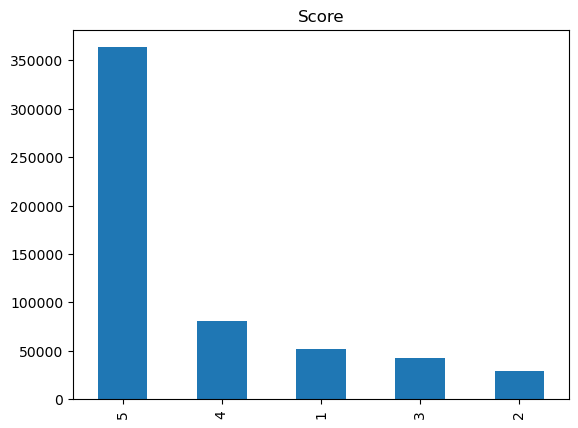

In [65]:
# visualization
df['Score'].value_counts().plot(kind='bar')
plt.title("Score")
plt.show()

In [33]:
#count unique 'points' values, grouped by team
print(df['HelpfulnessNumerator'].value_counts())

0      303826
1      116467
2       53727
3       29007
4       16963
        ...  
446         1
155         1
580         1
355         1
808         1
Name: HelpfulnessNumerator, Length: 231, dtype: int64


Text Preprocessing

In [94]:
def convert_to_lowercase(text):
    '''
    aim: change all texts to lower case
    '''

    text = text.lower()
    
    return text

def emoji_to_word(text):
    '''
    aim: remove all the emoji in the texts
    '''

    text = emoji.demojize(text, delimiters=("", ""))
    
    return text

def emoticons_to_word(text):
    '''
    aim: based on the emoticon dictionary, replace all the emoticons to corresponding word
    The emoticon dictionary is provided in the next block
    '''

    for key in Emoticon_Dictionary.keys():
        text = text.replace(key, Emoticon_Dictionary[key])

    return text

def remove_pattern(text, pattern):
    '''
    aim: remove all the "@users" appears in the texts
    '''

    pattern = "@\S+ "
    text = re.sub(pattern, "", text)

    return text

def remove_punctuation(text):
    '''
    aim: remove all the punctuation from the text given
    Punctuations are characters other than alphaters and digits.
    '''

    string = "" 
    for c in text: 
        if c.isalnum() or c.isspace(): 
            string += c
    text = string
    
    return text

def remove_stopwords(text):
    '''
    aim: remove all stopwords in the texts
    '''

    lst = ['above', 'below', 'over', 'under', 'again', 'once', 'most', 'some', 'no', 'nor', 'not', 'only', 'too', 'very', 'don', 'don\'t']

    stop_words = set([x for x in stopwords.words('english') if x not in lst])

    # print(len(stopwords.words('english')), len(stop_words))

    word_tokens = word_tokenize(text)
    filtered_sentence = []
    for w in word_tokens:
        if (w not in stop_words):
            filtered_sentence.append(w)

    text = (" ").join(filtered_sentence)

    return text

def remove_urls(text):
    '''
    aim: remove all the urls contained inside the texts
    '''

    text = re.sub(r'http\S+', '', text)

    return text

In [93]:
remove_stopwords("bro")

179 163


'bro'

In [96]:
def process_text(name, new_name):
    summary_list = df[name].values.tolist()
    # print(len(summary_list))

    # flatten text list
    flatten_list = lambda y:[x for a in y for x in flatten_list(a)] if type(y) is list else [y]
    summary_list = flatten_list(summary_list)

    tidy_list = []
    for text in summary_list:
        tidy = remove_urls(text)
        tidy = remove_pattern(tidy, pattern="")
        # tidy = emoji_to_word(tidy)
        # tidy = emoticons_to_word(tidy)
        tidy = convert_to_lowercase(tidy)
        tidy = remove_stopwords(tidy)
        tidy = remove_punctuation(tidy)
        tidy_list.append(tidy)

    df[new_name] = tidy_list

In [97]:
process_text('Summary', 'tidy_summary')
print(df[['tidy_summary']])

                          tidy_summary
0                good quality dog food
1                       not advertised
2                        delight  says
3                       cough medicine
4                          great taffy
...                                ...
568449                     not without
568450                    disappointed
568451                perfect maltipoo
568452  favorite training reward treat
568453                     great honey

[568454 rows x 1 columns]


In [98]:
summary_list = df['tidy_summary'].values.tolist()

Lemmatizaiton

In [99]:
def lemmatization(text):
    '''
    aim: perform lemmatization on the text
    '''

    lem=[]
    lemmatizer = WordNetLemmatizer()
    for word in text:
        lem_word = lemmatizer.lemmatize(word) # stemming word
        lem.append(lem_word)
    return lem

In [102]:
def tokenization(text):
    '''
    aim: perform tokenization on the text
    '''

    # tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    # token = tokenizer.tokenize(tweet)

    token = word_tokenize(text)

    return token


text_tokens = []
for t in summary_list:
    token = tokenization(t)
    text_tokens.append(token)


stem_list = []
lem_list = []
for text in text_tokens:
    lem_text = lemmatization(text)
    lem_list.append(" ".join(lem_text))


# df['stem_text'] = stem_list
df['lemm_text'] = lem_list

df[["tidy_summary","lemm_text"]].head(5)

,tidy_summary,lemm_text
0,good quality dog food,good quality dog food
1,not advertised,not advertised
2,delight says,delight say
3,cough medicine,cough medicine
4,great taffy,great taffy


Visualization

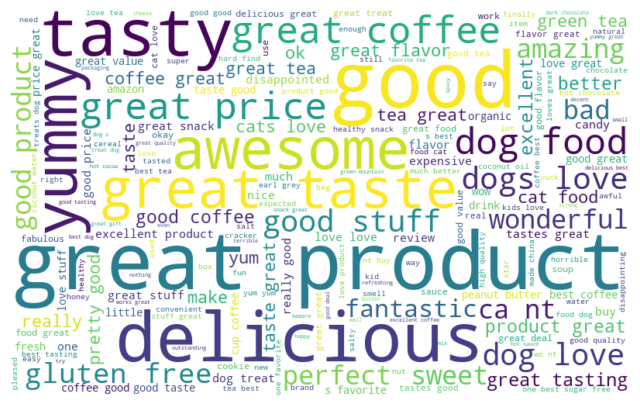

In [105]:
# wordcloud for all
plt.figure(figsize=(8, 6)) 
all_words = ' '.join([text for text in df['tidy_summary']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color='white').generate(all_words) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

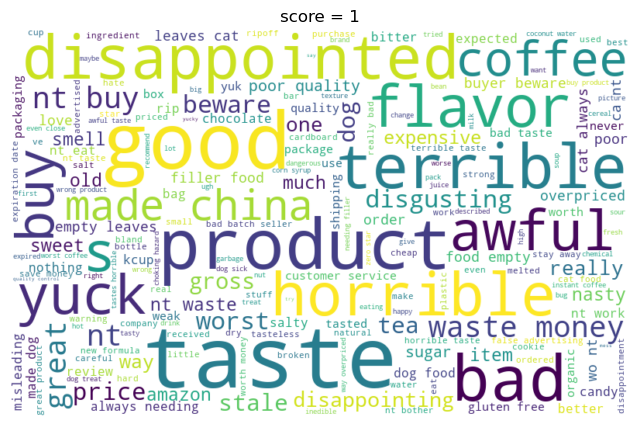

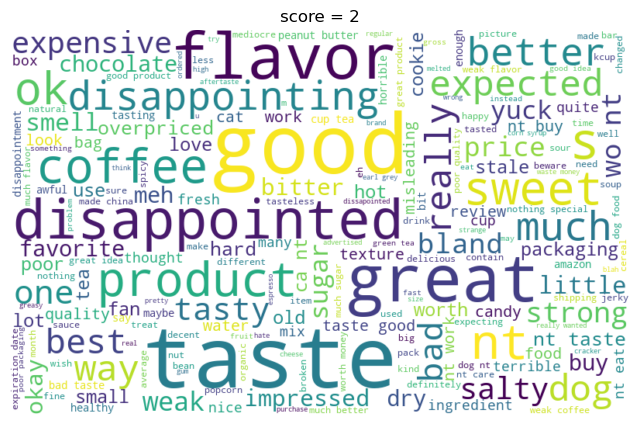

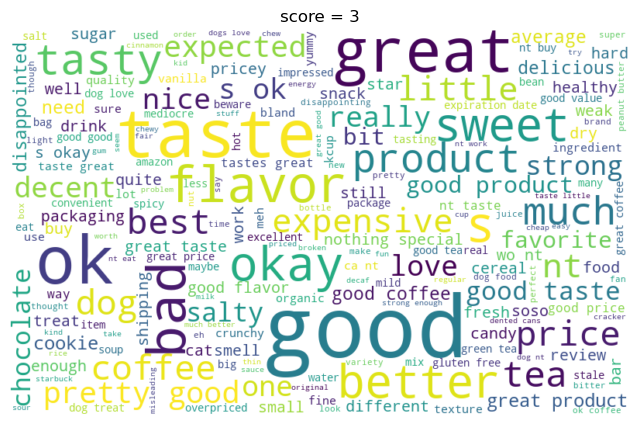

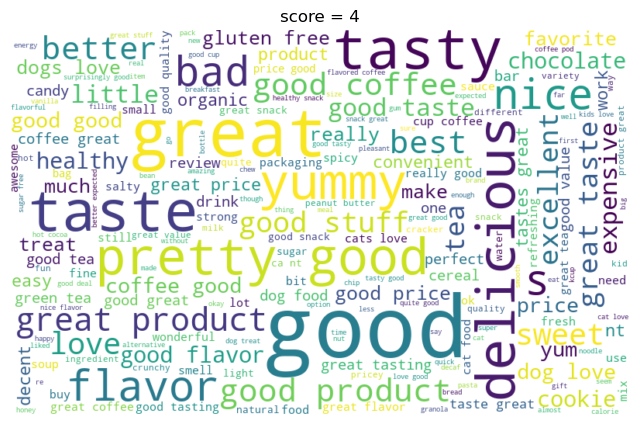

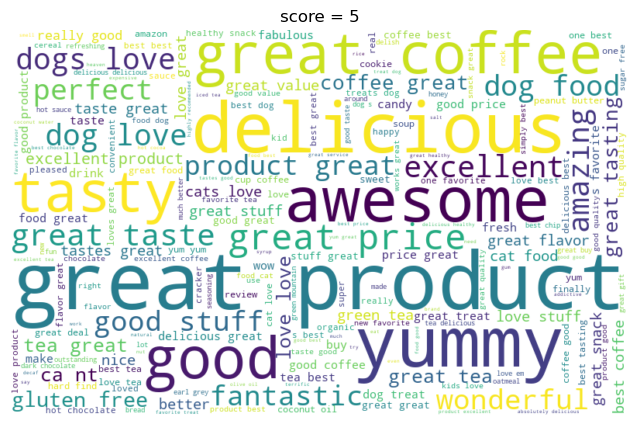

In [120]:
# wordcloud for all

scores = [1, 2, 3, 4, 5]
for score in scores:
    plt.figure(figsize=(8, 6)) 
    all_words = ' '.join([text for text in df['tidy_summary'][df['Score']==score]]) 
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color='white').generate(all_words) 
    plt.imshow(wordcloud, interpolation="bilinear") 
    plt.title("score = {}".format(score))
    plt.axis('off') 

    plt.show()

Modelling

In [121]:
# divide the datatset

tidy_values = df['tidy_summary'].values
sentiment = df['Score'].values
X_train, X_test, y_train, y_test = train_test_split(tidy_values, sentiment, test_size=0.2, random_state=42)


# feature extraction 1
# Bag of Words:
cv = CountVectorizer()
X1_train = cv.fit_transform(X_train)
X1_test = cv.transform(X_test)


# feature extraction 2
# tfidf
vectorizer = TfidfVectorizer()
X2_train = vectorizer.fit_transform(X_train)
X2_test = vectorizer.transform(X_test)

# # feature extraction 3
# # n-gram Bag of words
cv = CountVectorizer(lowercase=True, max_df=0.80, max_features=None, ngram_range=(1, 2))
X3_train = cv.fit_transform(X_train)
X3_test = cv.transform(X_test)

print(X3_train.shape, X3_test.shape)


(454763, 292331) (113691, 292331)


In [122]:
# KNN classifiers with different neighbors (1,2,3,4,... etc)


K = [1, 3, 5, 10, 15, 20]
acc1 = []
print("feature extractor 1: Bag of Words")
for k in range(len(K)):
    knn = KNeighborsClassifier(n_neighbors=K[k])
    knn.fit(X1_train, y_train)
    y1_hat = knn.predict(X1_test)
    print("%d-nn accuracy: %.2f %%" % (K[k], ((np.sum(y1_hat == y_test)/len(y_test)) * 100.0))) 
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y1_hat, average='macro')
    print("precision: %.2f %% recall: %.2f %% f1-score:  %.2f %%" % (precision*100, recall*100, f1*100))  
    acc1.append(f1)

acc2 = []
print("\n feature extractor 2: tfidf")
for k in range(len(K)):
    knn = KNeighborsClassifier(n_neighbors=K[k])
    knn.fit(X2_train, y_train)
    y2_hat = knn.predict(X2_test)
    print("%d-nn accuracy: %.2f %%" % (K[k], ((np.sum(y2_hat == y_test)/len(y_test)) * 100.0)))   
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y2_hat, average='macro')
    print("precision: %.2f %% recall: %.2f %% f1-score:  %.2f %%" % (precision*100, recall*100, f1*100)) 
    acc2.append(f1)


acc3 = []
print("\n feature extractor 3: 2-gram")
for k in range(len(K)):
    knn = KNeighborsClassifier(n_neighbors=K[k])
    knn.fit(X3_train, y_train)
    y3_hat = knn.predict(X3_test)
    print("%d-nn accuracy: %.2f %%" % (K[k], ((np.sum(y3_hat == y_test)/len(y_test)) * 100.0)))  
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y3_hat, average='macro')
    print("precision: %.2f %% recall: %.2f %% f1-score:  %.2f %%" % (precision*100, recall*100, f1*100))  
    acc3.append(f1)


feature extractor 1: Bag of Words
1-nn accuracy: 71.50 %
precision: 56.17 % recall: 55.20 % f1-score:  55.62 %
3-nn accuracy: 73.24 %
precision: 56.22 % recall: 54.70 % f1-score:  54.94 %
5-nn accuracy: 73.48 %
precision: 56.83 % recall: 53.86 % f1-score:  54.74 %
10-nn accuracy: 73.10 %
precision: 56.76 % recall: 50.19 % f1-score:  52.10 %
15-nn accuracy: 72.57 %
precision: 56.17 % recall: 47.32 % f1-score:  49.48 %
20-nn accuracy: 72.02 %
precision: 55.26 % recall: 45.61 % f1-score:  47.88 %

 feature extractor 2: tfidf
1-nn accuracy: 70.87 %
precision: 55.37 % recall: 54.58 % f1-score:  54.95 %
3-nn accuracy: 72.96 %
precision: 55.94 % recall: 53.71 % f1-score:  54.29 %
5-nn accuracy: 72.40 %
precision: 55.27 % recall: 52.96 % f1-score:  53.73 %
10-nn accuracy: 72.26 %
precision: 55.06 % recall: 49.06 % f1-score:  50.94 %
15-nn accuracy: 71.86 %
precision: 54.64 % recall: 46.57 % f1-score:  48.84 %
20-nn accuracy: 71.53 %
precision: 54.25 % recall: 44.66 % f1-score:  47.13 %

 featu